In [2]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Atur batas rekursi
sys.setrecursionlimit(10000)

# Fungsi untuk konversi ke superskrip
SUPERSCRIPT_MAP = {
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴",
    "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"
}
TRANS_TABLE = str.maketrans(SUPERSCRIPT_MAP)

def SUP(text):
    """Converts digits in a string to superscript."""
    return str(text).translate(TRANS_TABLE)


PROGRAM EKSPERIMEN KOMPLEKSITAS ALGORITMA
Dengan Analisis Kesesuaian Teori dan Penyimpanan Grafik

MELAKUKAN EKSPERIMEN 3: PERBANDINGAN ALGORITMA MAXIMUM SUBARRAY SUM
EKSPERIMEN 3: PERBANDINGAN ALGORITMA MAXIMUM SUBARRAY SUM

Eksperimen untuk n = 10¹ (ukuran array: 10)
Run #    O(n) (µs)       O(n log n) (µs)      O(n²) (µs)          
----------------------------------------------------------------------
1        8.20            14.90                19.30               
2        4.80            12.60                16.30               
3        4.40            11.00                15.70               
4        4.10            10.60                17.30               
5        4.30            11.10                17.20               
----------------------------------------------------------------------
Rata-rata 5.16            12.04                17.16               
Std Dev  1.54            1.58                 1.22                

Eksperimen untuk n = 10¹.² (ukuran array: 16)
Run 

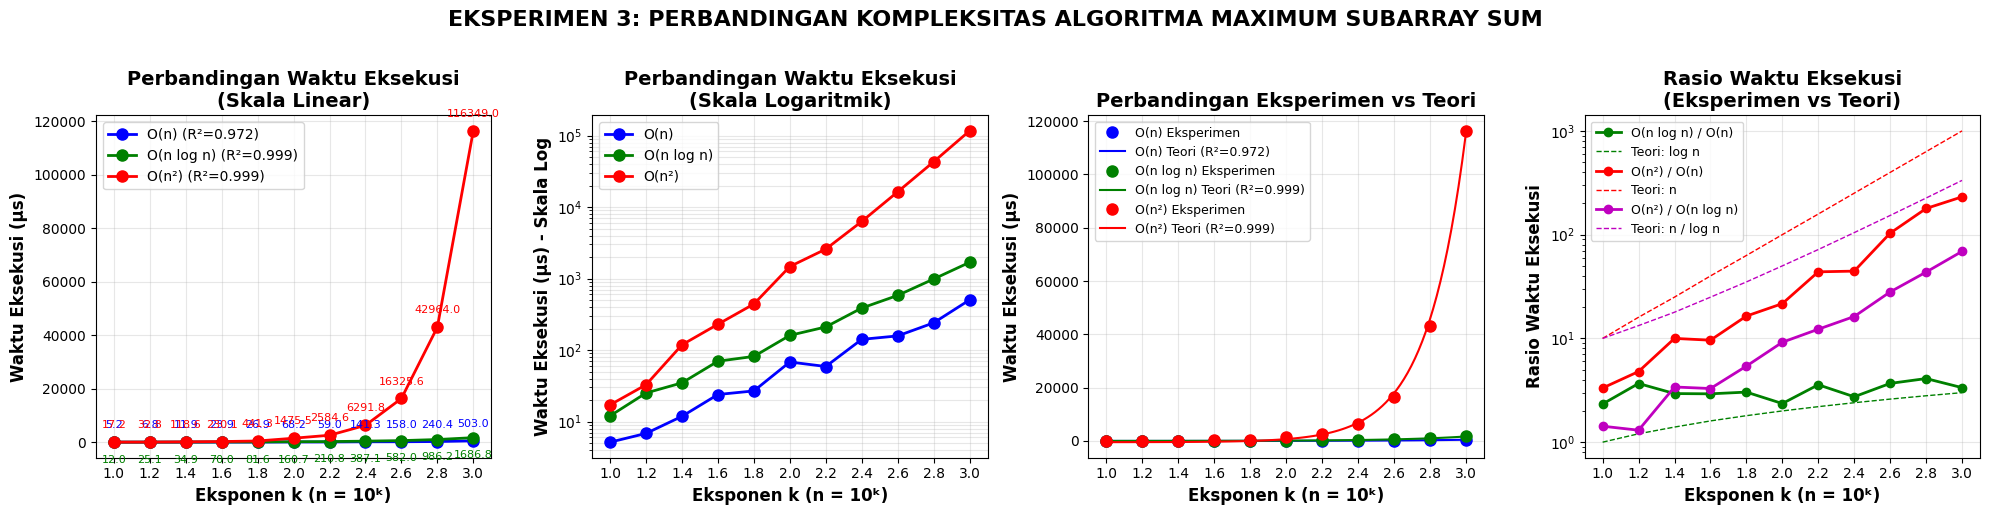

Grafik tambahan disimpan ke: eksperimen3_hasil_additional.png


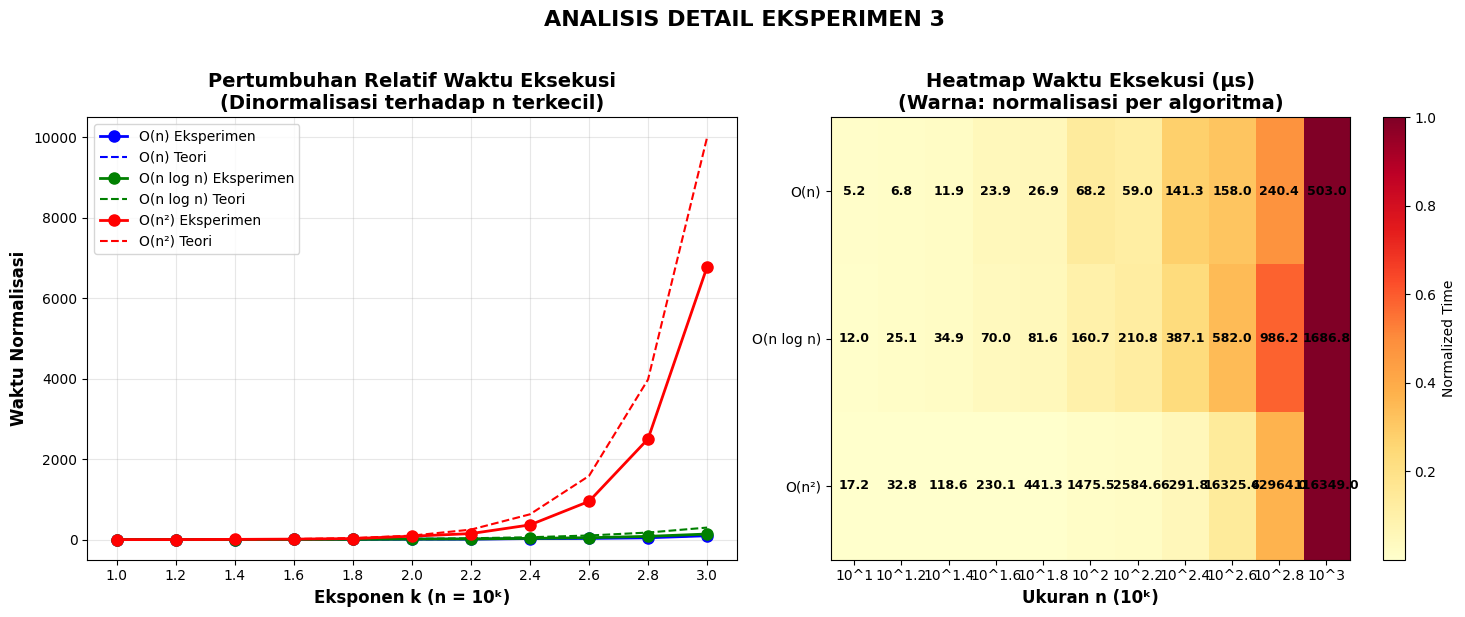


MEMBUAT VISUALISASI 3D EKSPERIMEN 3
Grafik 3D disimpan ke: eksperimen3_hasil_3d.png


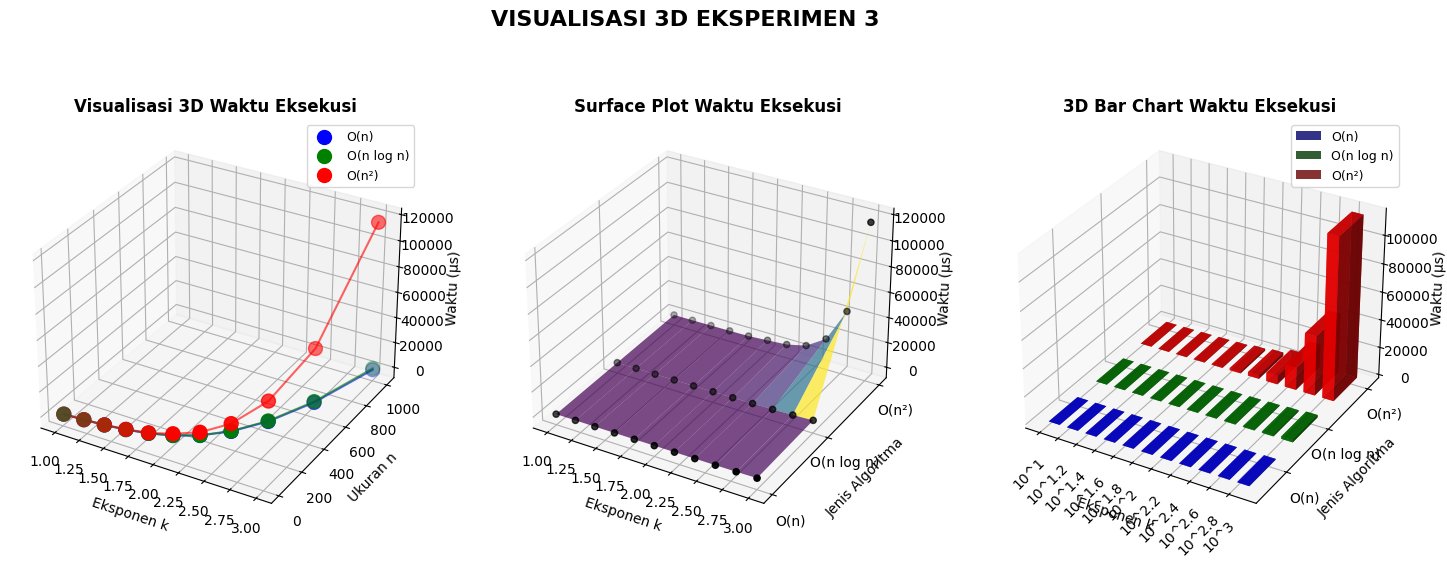


SELESAI! Semua grafik telah disimpan ke file PNG.

RINGKASAN HASIL EKSPERIMEN
Eksperimen 3: O(n) vs O(n log n) vs O(n²) - Disimpan ke beberapa file:
   - 'eksperimen3_hasil.png' (grafik utama)
   - 'eksperimen3_hasil_additional.png' (grafik tambahan)
   - 'eksperimen3_hasil_3d.png' (visualisasi 3D)


In [10]:
# ==================== EKSPERIMEN 3 ====================

def maxSubSum1(arr, idx=0, max_ending=0, max_so_far=0):
    """O(n) — Kadane rekursif (mengembalikan >= 0)."""
    if idx >= len(arr):
        return max_so_far
    max_ending = max(0, max_ending + arr[idx])
    max_so_far = max(max_so_far, max_ending)
    return maxSubSum1(arr, idx + 1, max_ending, max_so_far)

def maxSubSum2(arr, left, right):
    """O(n log n) — Divide and Conquer."""
    if left == right:
        return max(0, arr[left])

    center = (left + right) // 2
    maxLeftSum = maxSubSum2(arr, left, center)
    maxRightSum = maxSubSum2(arr, center + 1, right)

    maxLeftBorderSum = 0
    leftBorderSum = 0
    for i in range(center, left - 1, -1):
        leftBorderSum += arr[i]
        if leftBorderSum > maxLeftBorderSum:
            maxLeftBorderSum = leftBorderSum

    maxRightBorderSum = 0
    rightBorderSum = 0
    for i in range(center + 1, right + 1):
        rightBorderSum += arr[i]
        if rightBorderSum > maxRightBorderSum:
            maxRightBorderSum = rightBorderSum

    return max(maxLeftSum, maxRightSum, maxLeftBorderSum + maxRightBorderSum)

def maxSubSum3(arr, i=0):
    """O(n^2) — versi rekursif dari brute-force (mengembalikan >= 0)."""
    n = len(arr)
    if i >= n:
        return 0

    # inner recursion menghitung semua sum mulai dari i
    def inner(j, current_sum, best):
        if j >= n:
            return best
        current_sum += arr[j]
        if current_sum > best:
            best = current_sum
        return inner(j + 1, current_sum, best)

    best_from_i = inner(i, 0, 0)
    best_rest = maxSubSum3(arr, i + 1)
    return max(best_from_i, best_rest)

def generate_arr(n=16, low=-20, high=20, seed=None):
    """Membuat array acak dengan seed tertentu."""
    if seed is not None:
        np.random.seed(seed)
    return np.random.randint(low, high + 1, size=n).tolist()

def eksperimen3(k_values, arr_low=-20, arr_high=20, seed=42):
    """Menjalankan eksperimen 3 untuk daftar k_values."""
    print("=" * 70)
    print("EKSPERIMEN 3: PERBANDINGAN ALGORITMA MAXIMUM SUBARRAY SUM")
    print("=" * 70)
    
    hasil_eksperimen = []
    
    for k in k_values:
        n = round(10**k)
        arr = generate_arr(n, arr_low, arr_high, seed)
        
        print(f"\nEksperimen untuk n = 10{SUP(str(k))} (ukuran array: {n})")
        print(f"{'Run #':<8} {'O(n) (µs)':<15} {'O(n log n) (µs)':<20} {'O(n²) (µs)':<20}")
        print("-" * 70)
        
        t1_avg, t2_avg, t3_avg = 0, 0, 0
        t1_times, t2_times, t3_times = [], [], []
        
        for i in range(5):
            # O(n) - Kadane rekursif
            start1 = time.perf_counter()
            result1 = maxSubSum1(arr)
            end1 = time.perf_counter()
            t1 = (end1 - start1) * 1_000_000
            t1_times.append(t1)
            t1_avg += t1/5
            
            # O(n log n) - Divide and Conquer
            start2 = time.perf_counter()
            result2 = maxSubSum2(arr, 0, len(arr) - 1)
            end2 = time.perf_counter()
            t2 = (end2 - start2) * 1_000_000
            t2_times.append(t2)
            t2_avg += t2/5
            
            # O(n²) - Brute force rekursif
            start3 = time.perf_counter()
            result3 = maxSubSum3(arr)
            end3 = time.perf_counter()
            t3 = (end3 - start3) * 1_000_000
            t3_times.append(t3)
            t3_avg += t3/5
            
            print(f"{i+1:<8} {t1:<15.2f} {t2:<20.2f} {t3:<20.2f}")
        
        # Hitung standar deviasi
        t1_std = np.std(t1_times) if len(t1_times) > 1 else 0
        t2_std = np.std(t2_times) if len(t2_times) > 1 else 0
        t3_std = np.std(t3_times) if len(t3_times) > 1 else 0
        
        print("-" * 70)
        print(f"{'Rata-rata':<8} {t1_avg:<15.2f} {t2_avg:<20.2f} {t3_avg:<20.2f}")
        print(f"{'Std Dev':<8} {t1_std:<15.2f} {t2_std:<20.2f} {t3_std:<20.2f}")
        
        # Verifikasi semua algoritma memberikan hasil yang sama
        if not (result1 == result2 == result3):
            print(f"PERINGATAN: Hasil tidak konsisten! O(n)={result1}, O(n log n)={result2}, O(n²)={result3}")
        
        # Simpan hasil
        hasil_eksperimen.append((k, n, t1_avg, t1_std, t2_avg, t2_std, t3_avg, t3_std))
    
    print("\n" + "=" * 70)
    return hasil_eksperimen

def buat_tabel_eksperimen3(data):
    """Menampilkan tabel hasil eksperimen 3."""
    print("\n" + "=" * 120)
    print("HASIL EKSPERIMEN 3: PERBANDINGAN ALGORITMA MAXIMUM SUBARRAY SUM")
    print("=" * 120)
    print(f"{'k':<6} {'n':<12} {'O(n) (µs)':<15} {'Std':<8} {'O(n log n) (µs)':<18} {'Std':<8} {'O(n²) (µs)':<15} {'Std':<8} {'Rasio n²/n':<12}")
    print("-" * 120)
    
    for k, n, t1, t1_std, t2, t2_std, t3, t3_std in data:
        rasio = t3 / t1 if t1 > 0 else 0
        print(f"{k:<6} {n:<12} {t1:<15.2f} {t1_std:<8.2f} {t2:<18.2f} {t2_std:<8.2f} {t3:<15.2f} {t3_std:<8.2f} {rasio:<12.2f}")
    
    print("=" * 120)

def analisis_eksperimen3(data):
    """Analisis kesesuaian hasil eksperimen dengan teori O(n), O(n log n), dan O(n²)."""
    print("\n" + "=" * 100)
    print("ANALISIS KESESUAIAN TEORI DENGAN HASIL EKSPERIMEN 3")
    print("=" * 100)
    
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t1_values = [item[2] for item in data]  # O(n)
    t2_values = [item[4] for item in data]  # O(n log n)
    t3_values = [item[6] for item in data]  # O(n²)
    
    print(f"Jumlah titik data: {len(data)}")
    print(f"Rentang n: {min(n_values)} sampai {max(n_values)}")
    
    # Analisis O(n)
    print("\n1. ANALISIS O(n):")
    x_n = np.array(n_values)
    y_n = np.array(t1_values)
    
    if len(x_n) > 1:
        # Regresi linear: t1 = a * n + b
        slope_n, intercept_n, r_n, p_n, std_err_n = stats.linregress(x_n, y_n)
        print(f"   Regresi: waktu = {slope_n:.6f} * n + {intercept_n:.2f}")
        print(f"   R² = {r_n**2:.6f}")
        print(f"   P-value = {p_n:.6f}")
        
        # Hitung error prediksi
        prediksi_n = slope_n * x_n + intercept_n
        mape_n = np.mean(np.abs((y_n - prediksi_n) / y_n)) * 100 if np.mean(y_n) > 0 else 0
        print(f"   MAPE (Mean Absolute Percentage Error): {mape_n:.2f}%")
    else:
        print("   Data tidak cukup untuk analisis regresi")
        slope_n, intercept_n, r_n = 0, 0, 0
    
    # Analisis O(n log n)
    print("\n2. ANALISIS O(n log n):")
    x_nlogn = np.array([n * np.log10(n) for n in n_values])  # n log n (basis 10)
    y_nlogn = np.array(t2_values)
    
    if len(x_nlogn) > 1:
        # Regresi linear: t2 = a * (n log n) + b
        slope_nlogn, intercept_nlogn, r_nlogn, p_nlogn, std_err_nlogn = stats.linregress(x_nlogn, y_nlogn)
        print(f"   Regresi: waktu = {slope_nlogn:.6f} * (n log n) + {intercept_nlogn:.2f}")
        print(f"   R² = {r_nlogn**2:.6f}")
        print(f"   P-value = {p_nlogn:.6f}")
        
        # Hitung error prediksi
        prediksi_nlogn = slope_nlogn * x_nlogn + intercept_nlogn
        mape_nlogn = np.mean(np.abs((y_nlogn - prediksi_nlogn) / y_nlogn)) * 100 if np.mean(y_nlogn) > 0 else 0
        print(f"   MAPE: {mape_nlogn:.2f}%")
    else:
        print("   Data tidak cukup untuk analisis regresi")
        slope_nlogn, intercept_nlogn, r_nlogn = 0, 0, 0
    
    # Analisis O(n²)
    print("\n3. ANALISIS O(n²):")
    x_n2 = np.array([n**2 for n in n_values])  # n²
    y_n2 = np.array(t3_values)
    
    if len(x_n2) > 1:
        # Regresi linear: t3 = a * n² + b
        slope_n2, intercept_n2, r_n2, p_n2, std_err_n2 = stats.linregress(x_n2, y_n2)
        print(f"   Regresi: waktu = {slope_n2:.6f} * n² + {intercept_n2:.2f}")
        print(f"   R² = {r_n2**2:.6f}")
        print(f"   P-value = {p_n2:.6f}")
        
        # Hitung error prediksi
        prediksi_n2 = slope_n2 * x_n2 + intercept_n2
        mape_n2 = np.mean(np.abs((y_n2 - prediksi_n2) / y_n2)) * 100 if np.mean(y_n2) > 0 else 0
        print(f"   MAPE: {mape_n2:.2f}%")
    else:
        print("   Data tidak cukup untuk analisis regresi")
        slope_n2, intercept_n2, r_n2 = 0, 0, 0
    
    # Analisis pertumbuhan rasio
    print("\n4. ANALISIS PERTUMBUHAN RASIO:")
    print(f"{'k':<6} {'n':<12} {'n²/n':<12} {'t3/t1':<12} {'t2/t1':<12} {'t3/t2':<12}")
    print("-" * 80)
    
    for i, (k, n, t1, t1_std, t2, t2_std, t3, t3_std) in enumerate(data):
        rasio_n2_n = n  # n²/n = n
        rasio_t3_t1 = t3 / t1 if t1 > 0 else 0
        rasio_t2_t1 = t2 / t1 if t1 > 0 else 0
        rasio_t3_t2 = t3 / t2 if t2 > 0 else 0
        
        print(f"{k:<6} {n:<12} {rasio_n2_n:<12.1f} {rasio_t3_t1:<12.2f} {rasio_t2_t1:<12.2f} {rasio_t3_t2:<12.2f}")
    
    # Analisis kompleksitas asimtotik
    print("\n5. ANALISIS KOMPLEKSITAS ASIMTOTIK:")
    
    # Hitung rata-rata pertumbuhan
    if len(data) > 1:
        pertumbuhan_n = []
        pertumbuhan_nlogn = []
        pertumbuhan_n2 = []
        
        for i in range(1, len(data)):
            n_prev = n_values[i-1]
            n_curr = n_values[i]
            
            # Pertumbuhan teoritis
            teor_n = n_curr / n_prev
            teor_nlogn = (n_curr * np.log10(n_curr)) / (n_prev * np.log10(n_prev))
            teor_n2 = (n_curr**2) / (n_prev**2)
            
            # Pertumbuhan aktual
            akt_n = t1_values[i] / t1_values[i-1] if t1_values[i-1] > 0 else 0
            akt_nlogn = t2_values[i] / t2_values[i-1] if t2_values[i-1] > 0 else 0
            akt_n2 = t3_values[i] / t3_values[i-1] if t3_values[i-1] > 0 else 0
            
            pertumbuhan_n.append((teor_n, akt_n))
            pertumbuhan_nlogn.append((teor_nlogn, akt_nlogn))
            pertumbuhan_n2.append((teor_n2, akt_n2))
        
        print("   Pertumbuhan dari n ke n*10:")
        print(f"   O(n): Teori={pertumbuhan_n[-1][0]:.1f}x, Aktual={pertumbuhan_n[-1][1]:.2f}x")
        print(f"   O(n log n): Teori={pertumbuhan_nlogn[-1][0]:.1f}x, Aktual={pertumbuhan_nlogn[-1][1]:.2f}x")
        print(f"   O(n²): Teori={pertumbuhan_n2[-1][0]:.1f}x, Aktual={pertumbuhan_n2[-1][1]:.2f}x")
    
    # Kesimpulan
    print("\n6. KESIMPULAN:")
    
    if len(data) > 1:
        r2_threshold = 0.90
        mape_threshold = 20  # 20%
        
        kesimpulan_n = "SESUAI" if r_n**2 > r2_threshold and mape_n < mape_threshold else "KURANG SESUAI"
        kesimpulan_nlogn = "SESUAI" if r_nlogn**2 > r2_threshold and mape_nlogn < mape_threshold else "KURANG SESUAI"
        kesimpulan_n2 = "SESUAI" if r_n2**2 > r2_threshold and mape_n2 < mape_threshold else "KURANG SESUAI"
        
        print(f"   O(n): {kesimpulan_n} dengan teori (R²={r_n**2:.3f}, MAPE={mape_n:.1f}%)")
        print(f"   O(n log n): {kesimpulan_nlogn} dengan teori (R²={r_nlogn**2:.3f}, MAPE={mape_nlogn:.1f}%)")
        print(f"   O(n²): {kesimpulan_n2} dengan teori (R²={r_n2**2:.3f}, MAPE={mape_n2:.1f}%)")
    
    print("=" * 100)
    
    return (slope_n, intercept_n, r_n**2, mape_n,
            slope_nlogn, intercept_nlogn, r_nlogn**2, mape_nlogn,
            slope_n2, intercept_n2, r_n2**2, mape_n2)

def buat_grafik_eksperimen3(data, save_path=None):
    """Membuat grafik hasil eksperimen 3 dan menyimpannya ke file."""
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t1_values = [item[2] for item in data]  # O(n)
    t2_values = [item[4] for item in data]  # O(n log n)
    t3_values = [item[6] for item in data]  # O(n²)
    
    # Lakukan analisis untuk mendapatkan parameter regresi
    results = analisis_eksperimen3(data)
    (slope_n, intercept_n, r2_n, mape_n,
     slope_nlogn, intercept_nlogn, r2_nlogn, mape_nlogn,
     slope_n2, intercept_n2, r2_n2, mape_n2) = results
    
    # Buat figure dengan 4 subplot
    fig = plt.figure(figsize=(20, 5))
    
    # Plot 1: Grafik linear untuk ketiga algoritma
    ax1 = plt.subplot(1, 4, 1)
    
    ax1.plot(k_values, t1_values, 'bo-', linewidth=2, markersize=8, label=f'O(n) (R²={r2_n:.3f})')
    ax1.plot(k_values, t2_values, 'go-', linewidth=2, markersize=8, label=f'O(n log n) (R²={r2_nlogn:.3f})')
    ax1.plot(k_values, t3_values, 'ro-', linewidth=2, markersize=8, label=f'O(n²) (R²={r2_n2:.3f})')
    
    ax1.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12, fontweight='bold')
    ax1.set_title('Perbandingan Waktu Eksekusi\n(Skala Linear)', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10, loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(k_values)
    
    # Anotasi titik data
    for i, (k, t1, t2, t3) in enumerate(zip(k_values, t1_values, t2_values, t3_values)):
        ax1.annotate(f'{t1:.1f}', (k, t1), textcoords="offset points", xytext=(0,10), 
                    ha='center', fontsize=8, color='blue')
        ax1.annotate(f'{t2:.1f}', (k, t2), textcoords="offset points", xytext=(0,-15), 
                    ha='center', fontsize=8, color='green')
        ax1.annotate(f'{t3:.1f}', (k, t3), textcoords="offset points", xytext=(0,10), 
                    ha='center', fontsize=8, color='red')
    
    # Plot 2: Grafik logaritmik untuk melihat pertumbuhan eksponensial
    ax2 = plt.subplot(1, 4, 2)
    
    ax2.semilogy(k_values, t1_values, 'bo-', linewidth=2, markersize=8, label='O(n)')
    ax2.semilogy(k_values, t2_values, 'go-', linewidth=2, markersize=8, label='O(n log n)')
    ax2.semilogy(k_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n²)')
    
    ax2.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Waktu Eksekusi (µs) - Skala Log', fontsize=12, fontweight='bold')
    ax2.set_title('Perbandingan Waktu Eksekusi\n(Skala Logaritmik)', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10, loc='upper left')
    ax2.grid(True, alpha=0.3, which='both')
    ax2.set_xticks(k_values)
    
    # Plot 3: Grafik dengan garis teori (regresi)
    ax3 = plt.subplot(1, 4, 3)
    
    # Buat kurva halus untuk garis teori
    k_range = np.linspace(min(k_values), max(k_values), 100)
    n_range = 10**k_range
    
    # Prediksi teori
    teori_n = slope_n * n_range + intercept_n
    teori_nlogn = slope_nlogn * (n_range * np.log10(n_range)) + intercept_nlogn
    teori_n2 = slope_n2 * (n_range**2) + intercept_n2
    
    ax3.plot(k_values, t1_values, 'bo', markersize=8, label='O(n) Eksperimen')
    ax3.plot(k_range, teori_n, 'b-', linewidth=1.5, label=f'O(n) Teori (R²={r2_n:.3f})')
    
    ax3.plot(k_values, t2_values, 'go', markersize=8, label='O(n log n) Eksperimen')
    ax3.plot(k_range, teori_nlogn, 'g-', linewidth=1.5, label=f'O(n log n) Teori (R²={r2_nlogn:.3f})')
    
    ax3.plot(k_values, t3_values, 'ro', markersize=8, label='O(n²) Eksperimen')
    ax3.plot(k_range, teori_n2, 'r-', linewidth=1.5, label=f'O(n²) Teori (R²={r2_n2:.3f})')
    
    ax3.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Waktu Eksekusi (µs)', fontsize=12, fontweight='bold')
    ax3.set_title('Perbandingan Eksperimen vs Teori', fontsize=14, fontweight='bold')
    ax3.legend(fontsize=9, loc='upper left')
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(k_values)
    
    # Plot 4: Rasio waktu eksekusi
    ax4 = plt.subplot(1, 4, 4)
    
    rasio_t2_t1 = [t2 / t1 if t1 > 0 else 0 for t1, t2 in zip(t1_values, t2_values)]
    rasio_t3_t1 = [t3 / t1 if t1 > 0 else 0 for t1, t3 in zip(t1_values, t3_values)]
    rasio_t3_t2 = [t3 / t2 if t2 > 0 else 0 for t2, t3 in zip(t2_values, t3_values)]
    
    # Rasio teori
    rasio_teori_t2_t1 = [np.log10(n) for n in n_values]  # (n log n) / n = log n
    rasio_teori_t3_t1 = n_values  # n² / n = n
    rasio_teori_t3_t2 = [n / np.log10(n) for n in n_values]  # n² / (n log n) = n / log n
    
    ax4.plot(k_values, rasio_t2_t1, 'go-', linewidth=2, markersize=6, label='O(n log n) / O(n)')
    ax4.plot(k_values, rasio_teori_t2_t1, 'g--', linewidth=1, label='Teori: log n')
    
    ax4.plot(k_values, rasio_t3_t1, 'ro-', linewidth=2, markersize=6, label='O(n²) / O(n)')
    ax4.plot(k_values, rasio_teori_t3_t1, 'r--', linewidth=1, label='Teori: n')
    
    ax4.plot(k_values, rasio_t3_t2, 'mo-', linewidth=2, markersize=6, label='O(n²) / O(n log n)')
    ax4.plot(k_values, rasio_teori_t3_t2, 'm--', linewidth=1, label='Teori: n / log n')
    
    ax4.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Rasio Waktu Eksekusi', fontsize=12, fontweight='bold')
    ax4.set_title('Rasio Waktu Eksekusi\n(Eksperimen vs Teori)', fontsize=14, fontweight='bold')
    ax4.legend(fontsize=9, loc='upper left')
    ax4.grid(True, alpha=0.3)
    ax4.set_xticks(k_values)
    
    # Atur skala y untuk plot rasio
    if max(rasio_t3_t1) > 100:
        ax4.set_yscale('log')
    
    plt.suptitle('EKSPERIMEN 3: PERBANDINGAN KOMPLEKSITAS ALGORITMA MAXIMUM SUBARRAY SUM', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Simpan grafik jika path diberikan
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\nGrafik disimpan ke: {save_path}")
    
    plt.show()
    
    # Buat grafik tambahan: Perbandingan pertumbuhan
    fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 5: Pertumbuhan relatif (dinormalisasi)
    norm_t1 = [t / t1_values[0] for t in t1_values]
    norm_t2 = [t / t2_values[0] for t in t2_values]
    norm_t3 = [t / t3_values[0] for t in t3_values]
    
    # Teori pertumbuhan
    teori_norm_n = [n / n_values[0] for n in n_values]
    teori_norm_nlogn = [(n * np.log10(n)) / (n_values[0] * np.log10(n_values[0])) for n in n_values]
    teori_norm_n2 = [(n**2) / (n_values[0]**2) for n in n_values]
    
    ax5.plot(k_values, norm_t1, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax5.plot(k_values, teori_norm_n, 'b--', linewidth=1.5, label='O(n) Teori')
    
    ax5.plot(k_values, norm_t2, 'go-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')
    ax5.plot(k_values, teori_norm_nlogn, 'g--', linewidth=1.5, label='O(n log n) Teori')
    
    ax5.plot(k_values, norm_t3, 'ro-', linewidth=2, markersize=8, label='O(n²) Eksperimen')
    ax5.plot(k_values, teori_norm_n2, 'r--', linewidth=1.5, label='O(n²) Teori')
    
    ax5.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Waktu Normalisasi', fontsize=12, fontweight='bold')
    ax5.set_title('Pertumbuhan Relatif Waktu Eksekusi\n(Dinormalisasi terhadap n terkecil)', 
                  fontsize=14, fontweight='bold')
    ax5.legend(fontsize=10, loc='upper left')
    ax5.grid(True, alpha=0.3)
    ax5.set_xticks(k_values)
    
    # Plot 6: Heatmap perbandingan
    algorithms = ['O(n)', 'O(n log n)', 'O(n²)']
    times_matrix = np.array([t1_values, t2_values, t3_values])
    
    # Normalisasi per baris (per algoritma)
    times_normalized = times_matrix / np.max(times_matrix, axis=1, keepdims=True)
    
    im = ax6.imshow(times_normalized, cmap='YlOrRd', aspect='auto', interpolation='nearest')
    
    # Tampilkan nilai di heatmap
    for i in range(len(algorithms)):
        for j in range(len(k_values)):
            ax6.text(j, i, f'{times_matrix[i, j]:.1f}', 
                    ha='center', va='center', color='black', fontsize=9, fontweight='bold')
    
    ax6.set_xticks(range(len(k_values)))
    ax6.set_xticklabels([f'10^{k}' for k in k_values])
    ax6.set_yticks(range(len(algorithms)))
    ax6.set_yticklabels(algorithms)
    ax6.set_xlabel('Ukuran n (10ᵏ)', fontsize=12, fontweight='bold')
    ax6.set_title('Heatmap Waktu Eksekusi (µs)\n(Warna: normalisasi per algoritma)', 
                  fontsize=14, fontweight='bold')
    
    # Tambahkan colorbar
    plt.colorbar(im, ax=ax6, label='Normalized Time')
    
    plt.suptitle('ANALISIS DETAIL EKSPERIMEN 3', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Simpan grafik tambahan
    if save_path:
        save_path_additional = save_path.replace('.png', '_additional.png')
        plt.savefig(save_path_additional, dpi=300, bbox_inches='tight')
        print(f"Grafik tambahan disimpan ke: {save_path_additional}")
    
    plt.show()
    
    return fig, fig2

def buat_grafik_3d_eksperimen3(data, save_path=None):
    """Versi alternatif dengan plot 3D untuk visualisasi yang lebih menarik."""
    from mpl_toolkits.mplot3d import Axes3D
    
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t1_values = [item[2] for item in data]
    t2_values = [item[4] for item in data]
    t3_values = [item[6] for item in data]
    
    fig = plt.figure(figsize=(18, 6))
    
    # Plot 3D: Scatter plot
    ax1 = fig.add_subplot(131, projection='3d')
    
    # Plot titik-titik data
    ax1.scatter(k_values, n_values, t1_values, c='blue', s=100, label='O(n)', depthshade=True)
    ax1.scatter(k_values, n_values, t2_values, c='green', s=100, label='O(n log n)', depthshade=True)
    ax1.scatter(k_values, n_values, t3_values, c='red', s=100, label='O(n²)', depthshade=True)
    
    # Plot garis
    ax1.plot(k_values, n_values, t1_values, 'b-', alpha=0.6)
    ax1.plot(k_values, n_values, t2_values, 'g-', alpha=0.6)
    ax1.plot(k_values, n_values, t3_values, 'r-', alpha=0.6)
    
    ax1.set_xlabel('Eksponen k', fontsize=10)
    ax1.set_ylabel('Ukuran n', fontsize=10)
    ax1.set_zlabel('Waktu (µs)', fontsize=10)
    ax1.set_title('Visualisasi 3D Waktu Eksekusi', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    
    # Plot 3D: Surface plot
    ax2 = fig.add_subplot(132, projection='3d')
    
    # Buat grid untuk surface plot
    K = np.array(k_values)
    T = np.array([0, 1, 2])  # Jenis algoritma: 0=O(n), 1=O(n log n), 2=O(n²)
    
    K_grid, T_grid = np.meshgrid(K, T)
    
    # Buat Z grid
    Z = np.zeros_like(K_grid)
    for i, k in enumerate(K):
        Z[0, i] = t1_values[i]  # O(n)
        Z[1, i] = t2_values[i]  # O(n log n)
        Z[2, i] = t3_values[i]  # O(n²)
    
    # Plot surface
    ax2.plot_surface(K_grid, T_grid, Z, alpha=0.7, cmap='viridis')
    
    # Plot scatter points di atas surface
    ax2.scatter(K_grid, T_grid, Z, c='black', s=20)
    
    ax2.set_xlabel('Eksponen k', fontsize=10)
    ax2.set_ylabel('Jenis Algoritma', fontsize=10)
    ax2.set_zlabel('Waktu (µs)', fontsize=10)
    ax2.set_title('Surface Plot Waktu Eksekusi', fontsize=12, fontweight='bold')
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels(['O(n)', 'O(n log n)', 'O(n²)'])
    
    # Plot 3D: Bar chart
    ax3 = fig.add_subplot(133, projection='3d')
    
    xpos = np.arange(len(k_values))
    ypos = [0, 1, 2]  # Jenis algoritma
    xpos, ypos = np.meshgrid(xpos, ypos, indexing="ij")
    
    zpos = np.zeros_like(xpos)
    
    # Data untuk setiap algoritma
    dx = dy = 0.6
    dz = np.array([t1_values, t2_values, t3_values]).T
    
    colors = ['blue', 'green', 'red']
    for i in range(3):
        ax3.bar3d(xpos[:, i], ypos[:, i], zpos[:, i], dx, dy, dz[:, i],
                 color=colors[i], alpha=0.8, label=['O(n)', 'O(n log n)', 'O(n²)'][i])
    
    ax3.set_xlabel('Eksponen k', fontsize=10)
    ax3.set_ylabel('Jenis Algoritma', fontsize=10)
    ax3.set_zlabel('Waktu (µs)', fontsize=10)
    ax3.set_title('3D Bar Chart Waktu Eksekusi', fontsize=12, fontweight='bold')
    ax3.set_xticks(range(len(k_values)))
    ax3.set_xticklabels([f"10^{k}" for k in k_values], rotation=45)
    ax3.set_yticks([0.5, 1.5, 2.5])
    ax3.set_yticklabels(['O(n)', 'O(n log n)', 'O(n²)'])
    ax3.legend(fontsize=9)
    
    plt.suptitle('VISUALISASI 3D EKSPERIMEN 3', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Simpan grafik 3D jika path diberikan
    if save_path:
        save_path_3d = save_path.replace('.png', '_3d.png')
        plt.savefig(save_path_3d, dpi=300, bbox_inches='tight')
        print(f"Grafik 3D disimpan ke: {save_path_3d}")
    
    plt.show()
    
    return fig

# ==================== FUNGSI UTAMA YANG DIPERBARUI ====================

def main():
    """Fungsi utama untuk menjalankan semua eksperimen."""
    print("=" * 80)
    print("PROGRAM EKSPERIMEN KOMPLEKSITAS ALGORITMA")
    print("Dengan Analisis Kesesuaian Teori dan Penyimpanan Grafik")
    print("=" * 80)
    
    # EKSPERIMEN 3
    print("\n" + "=" * 80)
    print("MELAKUKAN EKSPERIMEN 3: PERBANDINGAN ALGORITMA MAXIMUM SUBARRAY SUM")
    print("=" * 80)
    
    # Untuk eksperimen 3, kita gunakan nilai k yang kecil karena O(n²) tumbuh sangat cepat
    # Nilai k dari 1 sampai 4 sudah cukup untuk melihat perbedaan
    k_values_3 = [1, 1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8, 3]
    hasil_eksperimen3 = eksperimen3(k_values_3)
    
    # Tampilkan tabel
    buat_tabel_eksperimen3(hasil_eksperimen3)
    
    # Analisis kesesuaian
    print("\nAnalisis Kesesuaian Eksperimen 3:")
    analisis_eksperimen3(hasil_eksperimen3)
    
    # Buat dan simpan grafik
    fig3_1, fig3_2 = buat_grafik_eksperimen3(hasil_eksperimen3, save_path="eksperimen3_hasil.png")
    
    # Buat grafik 3D (opsional)
    print("\n" + "=" * 80)
    print("MEMBUAT VISUALISASI 3D EKSPERIMEN 3")
    print("=" * 80)
    fig3_3d = buat_grafik_3d_eksperimen3(hasil_eksperimen3, save_path="eksperimen3_hasil.png")
    
    print("\n" + "=" * 80)
    print("SELESAI! Semua grafik telah disimpan ke file PNG.")
    print("=" * 80)
    
    # Ringkasan hasil
    print("\n" + "=" * 80)
    print("RINGKASAN HASIL EKSPERIMEN")
    print("=" * 80)
    print("Eksperimen 3: O(n) vs O(n log n) vs O(n²) - Disimpan ke beberapa file:")
    print("   - 'eksperimen3_hasil.png' (grafik utama)")
    print("   - 'eksperimen3_hasil_additional.png' (grafik tambahan)")
    print("   - 'eksperimen3_hasil_3d.png' (visualisasi 3D)")
    print("=" * 80)

# ==================== EKSEKUSI PROGRAM ====================

if __name__ == "__main__":
    main()